In [1]:
def eval_Sresult(r, p, α=0.05):
    if p < α:
        return print(f"""Reject the null hypothesis. There is a linear correlation.
Spearman’s r: {r:2f}
P-value: {p}""")
    else:
        return print(f"""We fail to reject the null hypothesis that there is a linear correlation.
Spearman’s r: {r:2f}
P-value: {p}""")

In [2]:
import env
import os
import wrangle_zillow
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats
warnings.filterwarnings("ignore")
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Aquire

In [3]:
df = wrangle_zillow.get_zillow_data()

wrangle_zillow.summarize(df)

Shape of Data: 
(71690, 30)
Info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71690 entries, 0 to 71689
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    71690 non-null  int64  
 1   id                            71690 non-null  int64  
 2   parcelid                      71690 non-null  int64  
 3   bathroomcnt                   71690 non-null  float64
 4   bedroomcnt                    71690 non-null  float64
 5   calculatedbathnbr             71472 non-null  float64
 6   calculatedfinishedsquarefeet  71538 non-null  float64
 7   finishedsquarefeet12          71359 non-null  float64
 8   fips                          71690 non-null  float64
 9   fullbathcnt                   71472 non-null  float64
 10  latitude                      71690 non-null  float64
 11  longitude                     71690 non-null  float64
 12  lotsizesquarefeet        

# Prepare

In [4]:
df = df[df['bedroomcnt'] != 0]

df.bedroomcnt.value_counts()

bedroomcnt
3.0     28859
2.0     18366
4.0     15950
5.0      3987
1.0      3318
6.0       634
7.0       106
8.0        24
9.0         8
10.0        2
14.0        1
11.0        1
12.0        1
Name: count, dtype: int64

In [5]:
df = df[df['bathroomcnt'] != 0]

df.bathroomcnt.value_counts()

bathroomcnt
2.0     29607
3.0     15333
1.0     12571
2.5      6537
4.0      2490
1.5      1375
3.5      1033
5.0       823
4.5       694
6.0       324
5.5       224
7.0        88
8.0        53
6.5        47
7.5        16
9.0        13
10.0        5
11.0        3
8.5         3
18.0        1
13.0        1
Name: count, dtype: int64

# Split

In [6]:
train, validate, test = wrangle_zillow.split_data(df)

wrangle_zillow.view_split(train, validate, test)

train    -> (39894, 30)
validate -> (17098, 30)
test     -> (14249, 30)


In [7]:
train.head().T

,9913,6175,53744,15678,17475
Unnamed: 0,10748,6676,58010,16963,18918
id,1269474,63912,706233,2769816,1990470
parcelid,10824297,11573966,11825751,14076872,12253638
bathroomcnt,1.0,3.0,2.0,3.5,1.0
bedroomcnt,2.0,3.0,3.0,4.0,2.0
calculatedbathnbr,1.0,3.0,2.0,3.5,1.0
calculatedfinishedsquarefeet,838.0,1520.0,967.0,2770.0,1310.0
finishedsquarefeet12,838.0,1520.0,967.0,2770.0,1310.0
fips,6037.0,6037.0,6037.0,6059.0,6037.0
fullbathcnt,1.0,3.0,2.0,3.0,1.0


In [8]:
train.bedroomcnt.value_counts()

bedroomcnt
3.0     16099
2.0     10392
4.0      8885
5.0      2257
1.0      1859
6.0       329
7.0        53
8.0        15
9.0         2
14.0        1
12.0        1
10.0        1
Name: count, dtype: int64

# create bins

In [9]:
train['logerror_bins'] = pd.cut(train.logerror,[-5,  -0.5, 0.5, 5], labels=['under_neg_one', 'zero', 'over_one'])

train.head().T

,9913,6175,53744,15678,17475
Unnamed: 0,10748,6676,58010,16963,18918
id,1269474,63912,706233,2769816,1990470
parcelid,10824297,11573966,11825751,14076872,12253638
bathroomcnt,1.0,3.0,2.0,3.5,1.0
bedroomcnt,2.0,3.0,3.0,4.0,2.0
calculatedbathnbr,1.0,3.0,2.0,3.5,1.0
calculatedfinishedsquarefeet,838.0,1520.0,967.0,2770.0,1310.0
finishedsquarefeet12,838.0,1520.0,967.0,2770.0,1310.0
fips,6037.0,6037.0,6037.0,6059.0,6037.0
fullbathcnt,1.0,3.0,2.0,3.0,1.0


# Explore

## Target variable distrobution 

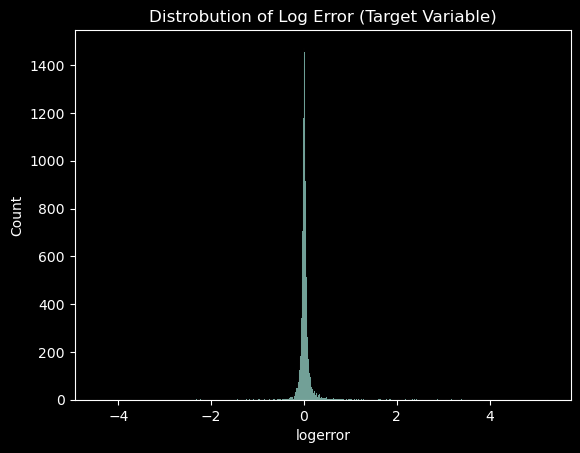

In [10]:
sns.histplot(data=train, x='logerror')
plt.title('Distrobution of Log Error (Target Variable)')
plt.show()

# Q

### What is the distrobution of each variable? 

In [11]:
def plot_variable_pair(df, cols):
    for i in cols:
        sns.lmplot(x=i, y="logerror", data=df, line_kws={'color': 'red'})
        plt.show()

In [12]:
explore_cols = [
    col for col in train.columns 
]

In [13]:
explore_cols.pop(13) # was an object 

'propertycountylandusecode'

In [14]:
explore_cols.pop(28) # was an object 

'propertylandusedesc'

In [15]:
explore_cols.pop(27) # was an object 

'transactiondate'

In [16]:
explore_cols

['Unnamed: 0',
 'id',
 'parcelid',
 'bathroomcnt',
 'bedroomcnt',
 'calculatedbathnbr',
 'calculatedfinishedsquarefeet',
 'finishedsquarefeet12',
 'fips',
 'fullbathcnt',
 'latitude',
 'longitude',
 'lotsizesquarefeet',
 'propertylandusetypeid',
 'rawcensustractandblock',
 'regionidcity',
 'regionidcounty',
 'regionidzip',
 'roomcnt',
 'yearbuilt',
 'structuretaxvaluedollarcnt',
 'taxvaluedollarcnt',
 'assessmentyear',
 'landtaxvaluedollarcnt',
 'taxamount',
 'censustractandblock',
 'logerror',
 'logerror_bins']

In [17]:
def plot_distrobution(df, cols):
    for i in cols:
        sns.histplot(x=i, data=df)
        plt.show()

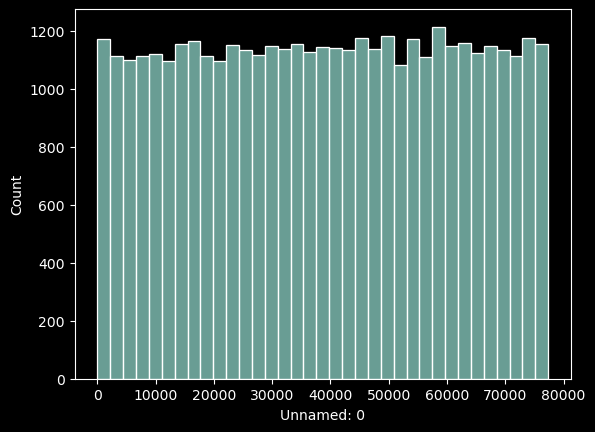

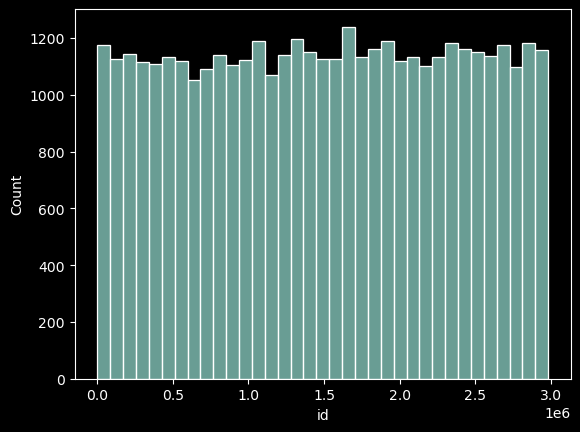

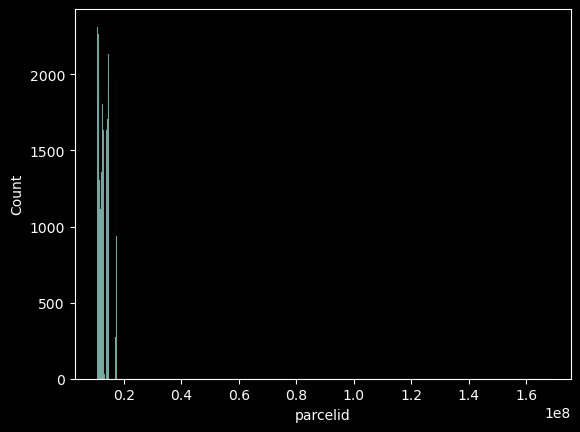

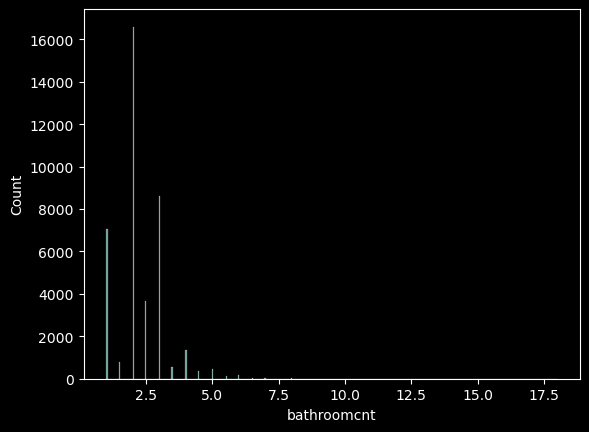

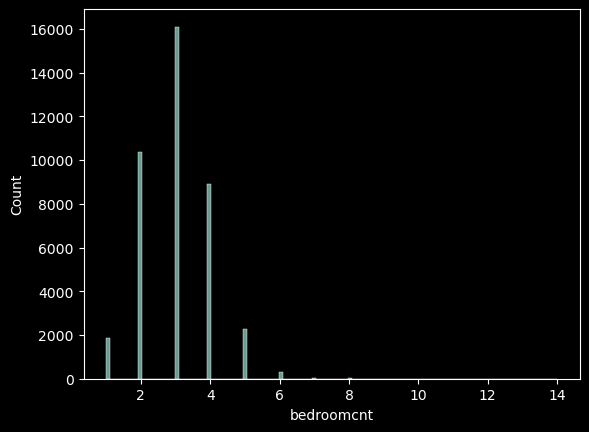

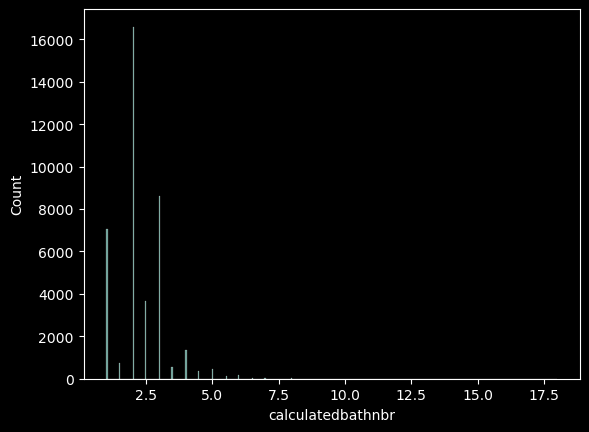

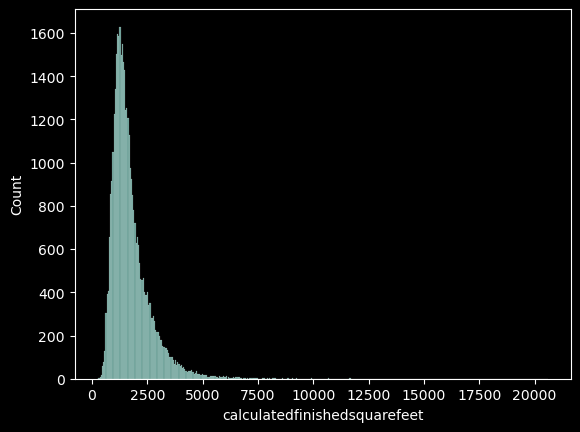

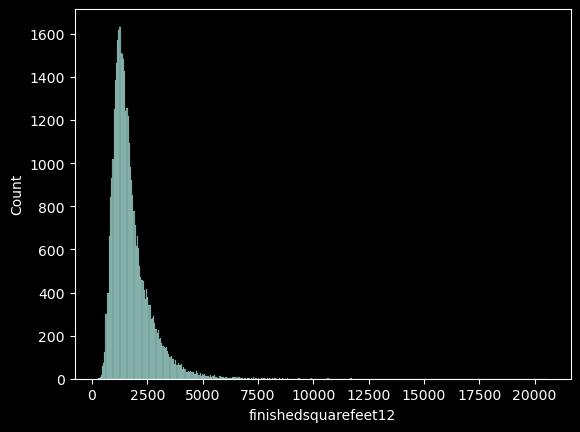

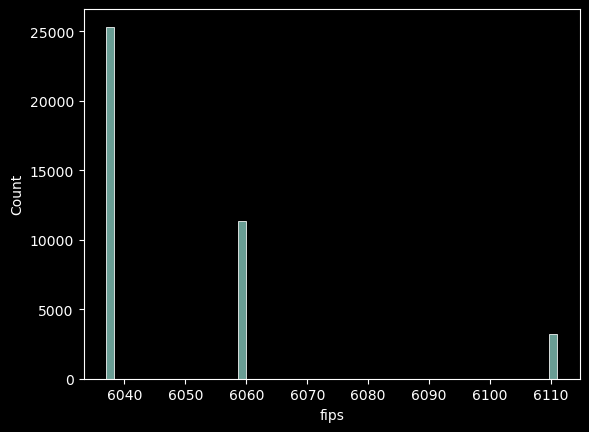

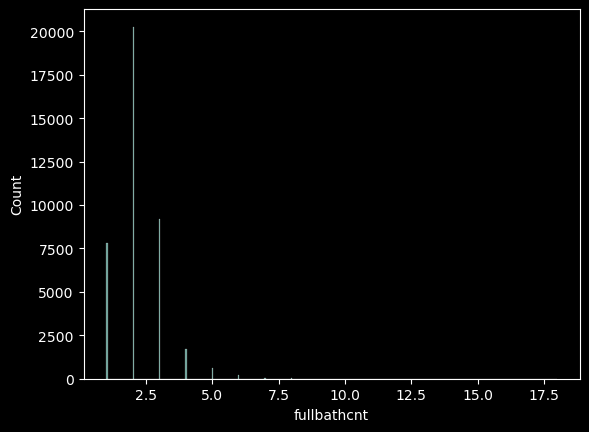

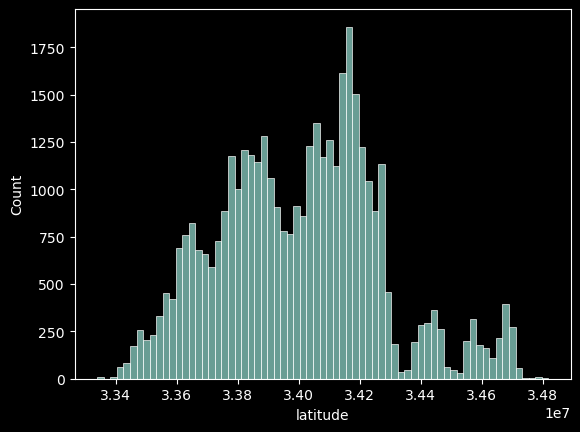

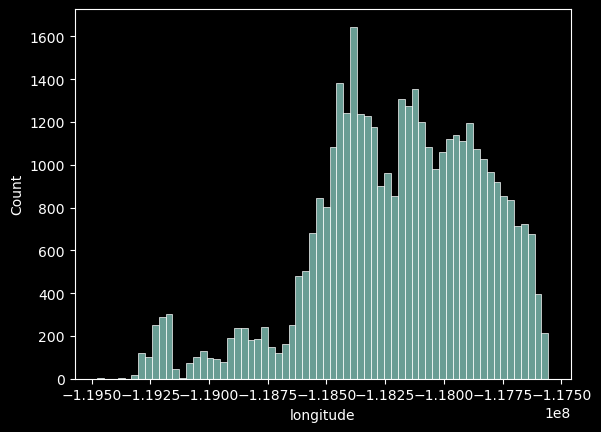

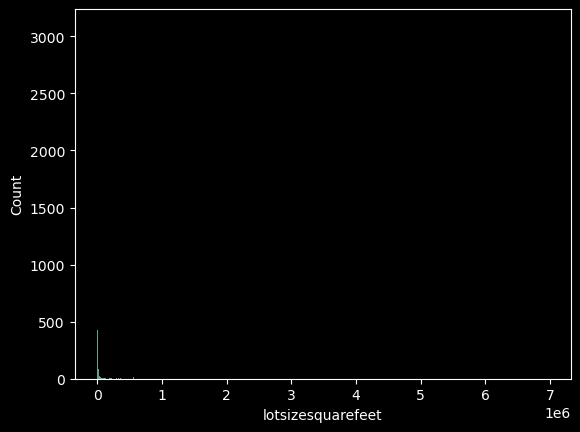

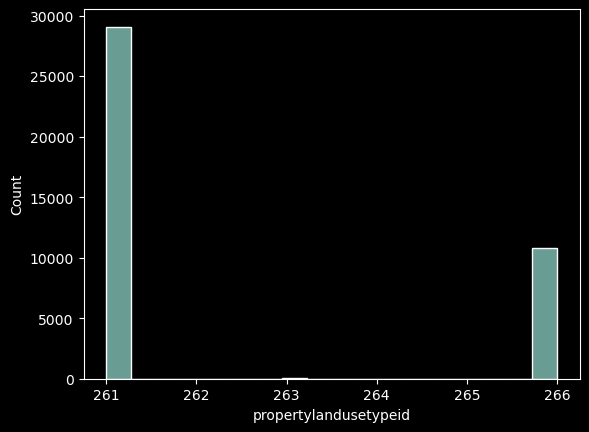

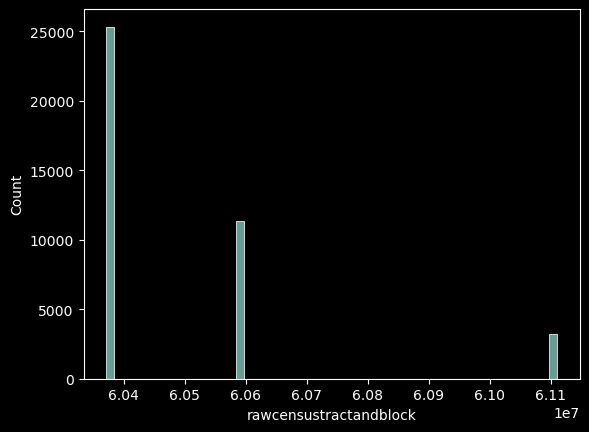

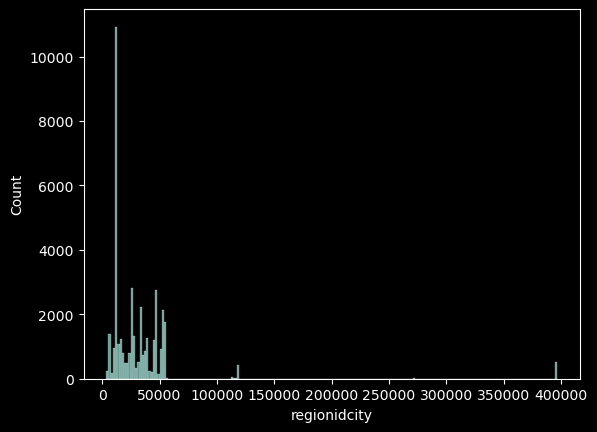

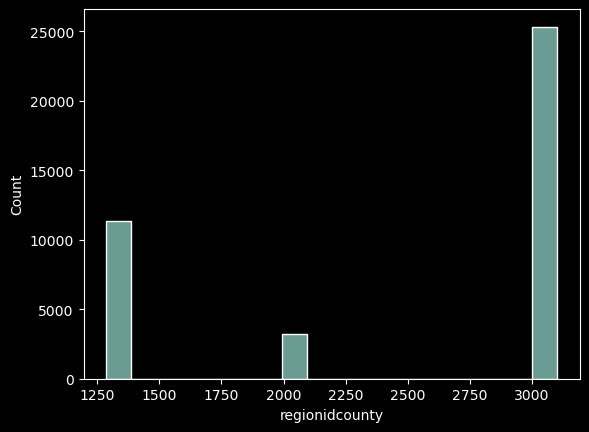

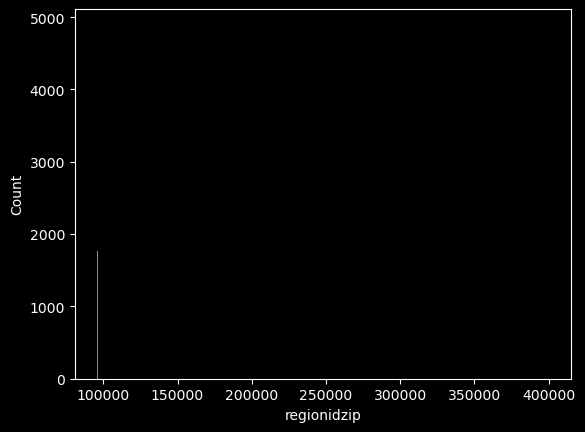

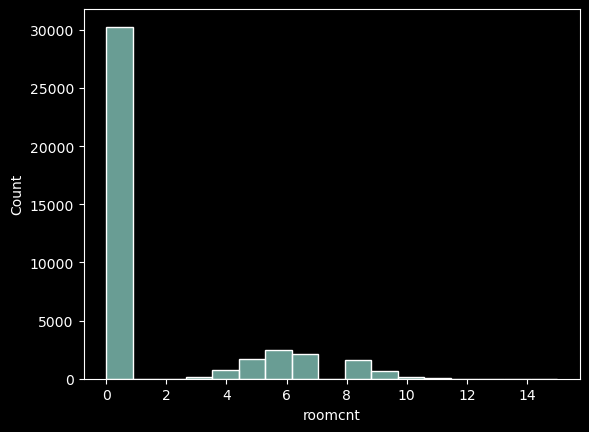

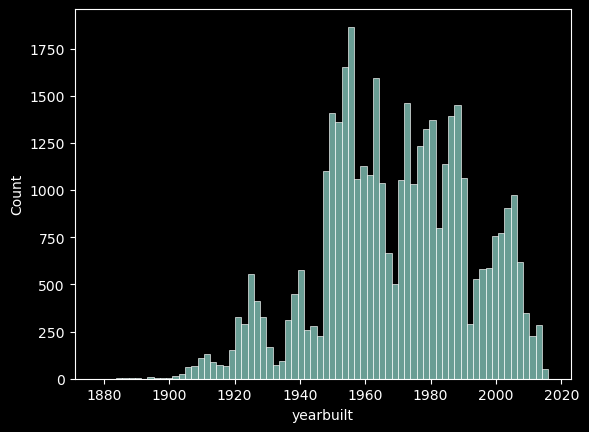

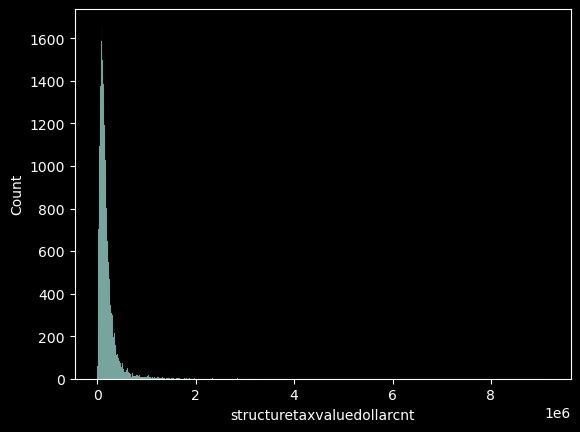

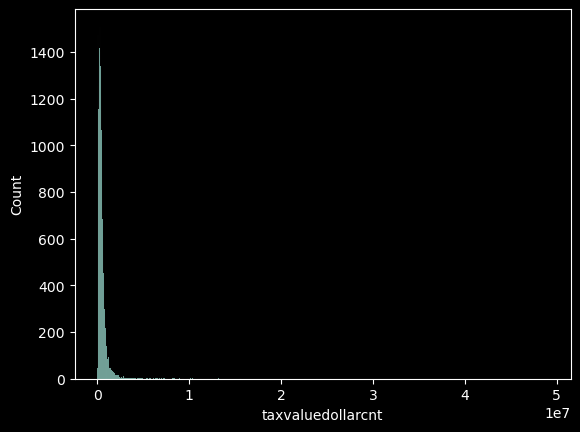

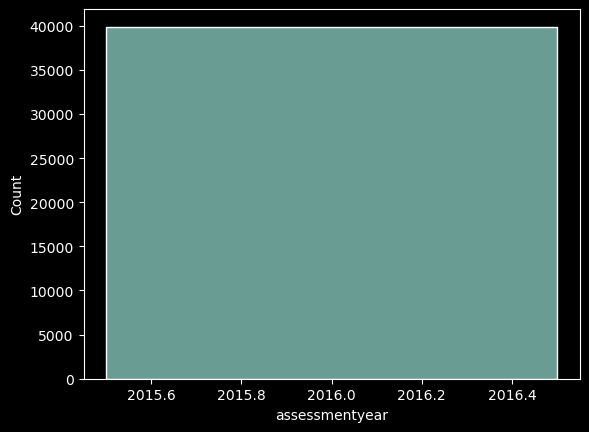

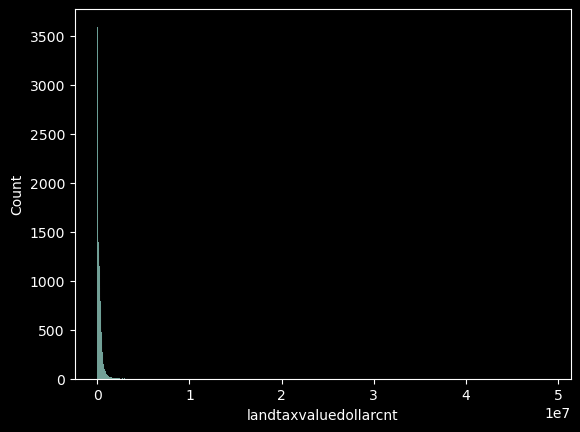

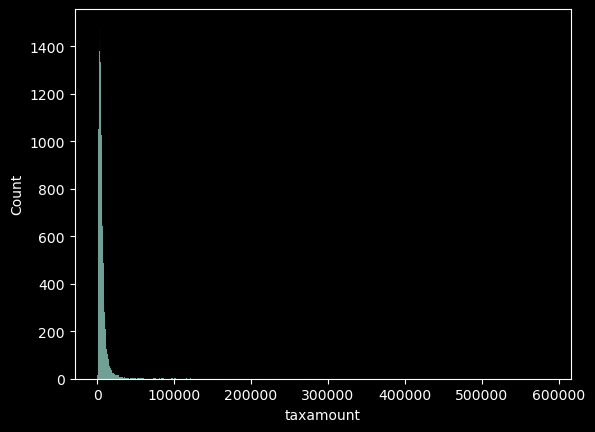

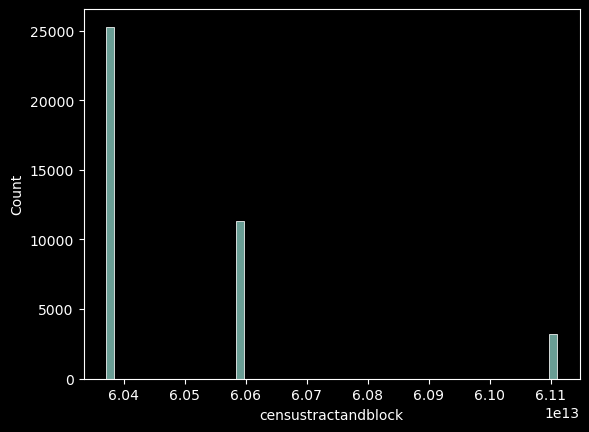

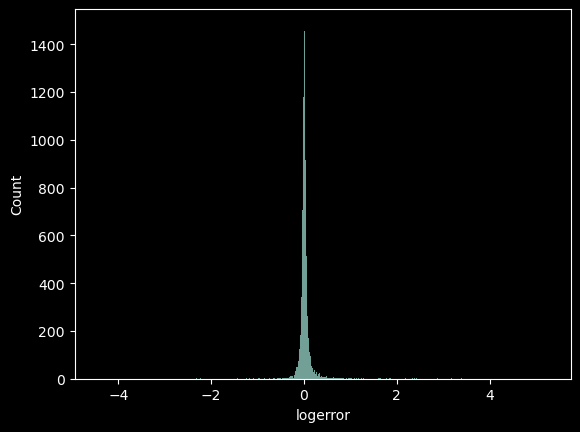

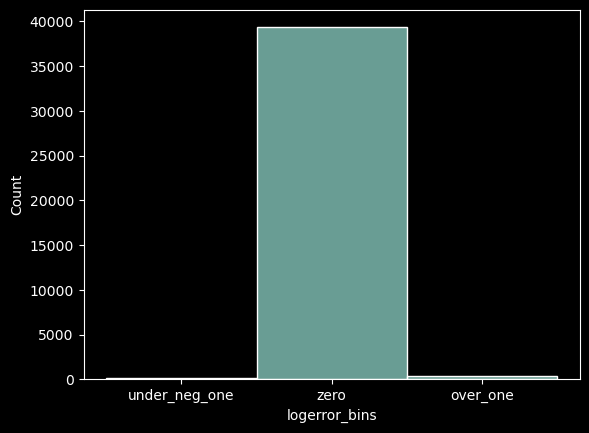

In [18]:
plot_distrobution(df= train, cols= explore_cols)

In [19]:
train.head().T

,9913,6175,53744,15678,17475
Unnamed: 0,10748,6676,58010,16963,18918
id,1269474,63912,706233,2769816,1990470
parcelid,10824297,11573966,11825751,14076872,12253638
bathroomcnt,1.0,3.0,2.0,3.5,1.0
bedroomcnt,2.0,3.0,3.0,4.0,2.0
calculatedbathnbr,1.0,3.0,2.0,3.5,1.0
calculatedfinishedsquarefeet,838.0,1520.0,967.0,2770.0,1310.0
finishedsquarefeet12,838.0,1520.0,967.0,2770.0,1310.0
fips,6037.0,6037.0,6037.0,6059.0,6037.0
fullbathcnt,1.0,3.0,2.0,3.0,1.0


### Takeaways
- drop Unnamed, id
- Tax amount, tax value, land tax value, structure tax value:  Right skewed
- yearbuilt: Left skewed  

# Q

### Does the log error differ across propertylandusedesc?


<Axes: xlabel='propertylandusedesc', ylabel='logerror'>

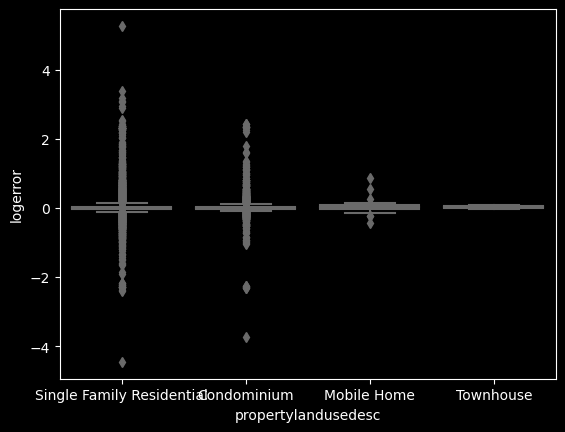

In [20]:
sns.boxplot(data=train, x='propertylandusedesc', y='logerror')


<Axes: xlabel='propertylandusedesc', ylabel='logerror'>

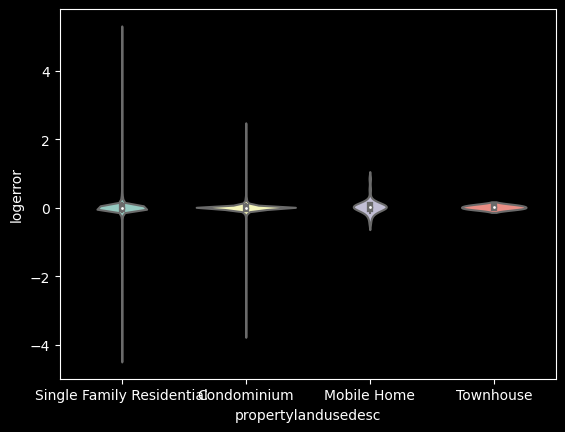

In [21]:
sns.violinplot(data=train, x='propertylandusedesc', y='logerror')


### Takeaways
- large outliers for single family residential and condominium (makes up a majority of my data)


# Q

### Is there a relationship between log error and tax value dollar cnt?


<Axes: xlabel='taxvaluedollarcnt', ylabel='Count'>

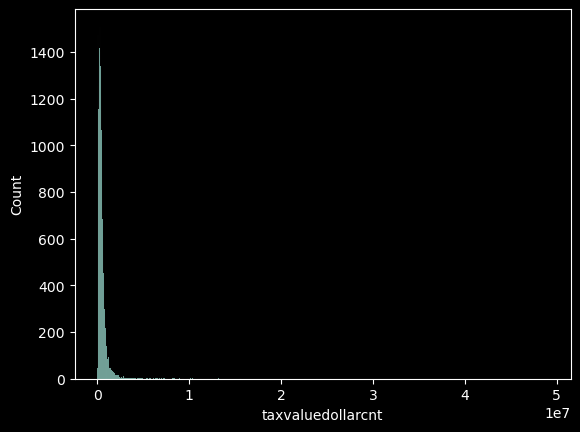

In [22]:
sns.histplot(data=train, x='taxvaluedollarcnt')

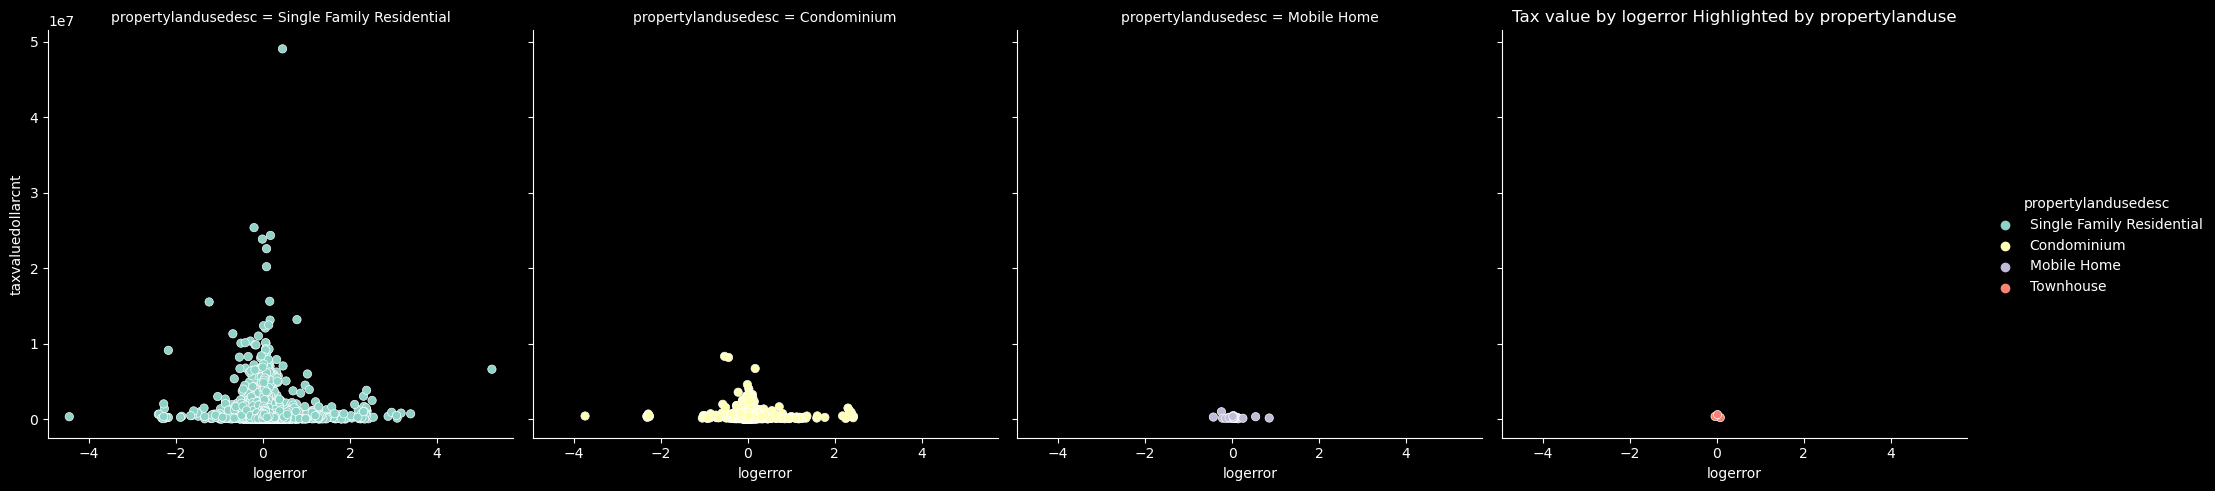

In [23]:
sns.relplot(
    data=train, 
    x='logerror', 
    y='taxvaluedollarcnt', 
    hue='propertylandusedesc',
    col='propertylandusedesc')
plt.title('Tax value by logerror Highlighted by propertylanduse')
plt.show()

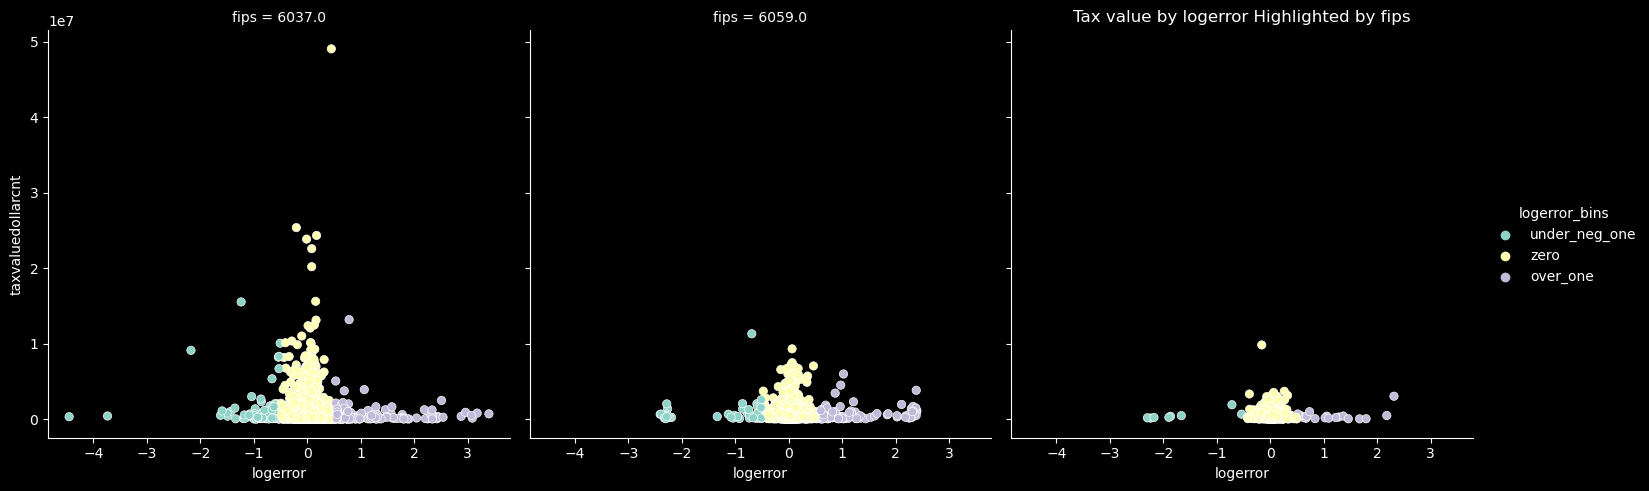

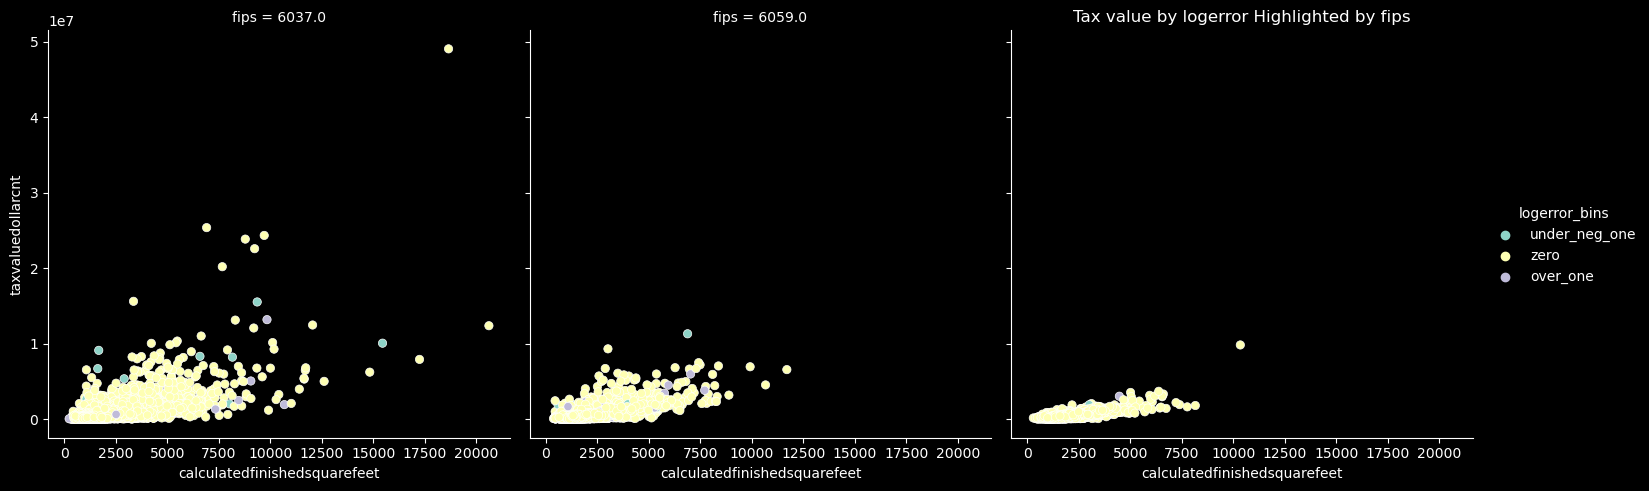

In [ ]:
sns.relplot(
    data=train, 
    x='calculatedfinishedsquarefeet', 
    y='taxvaluedollarcnt', 
    hue='logerror_bins', 
    col='fips')
plt.title('Tax value by logerror Highlighted by fips')
plt.show()

# 6037:'LA',6059:'Orange',6111:'Ventura

### What about structuretaxvaluedollarcnt? 

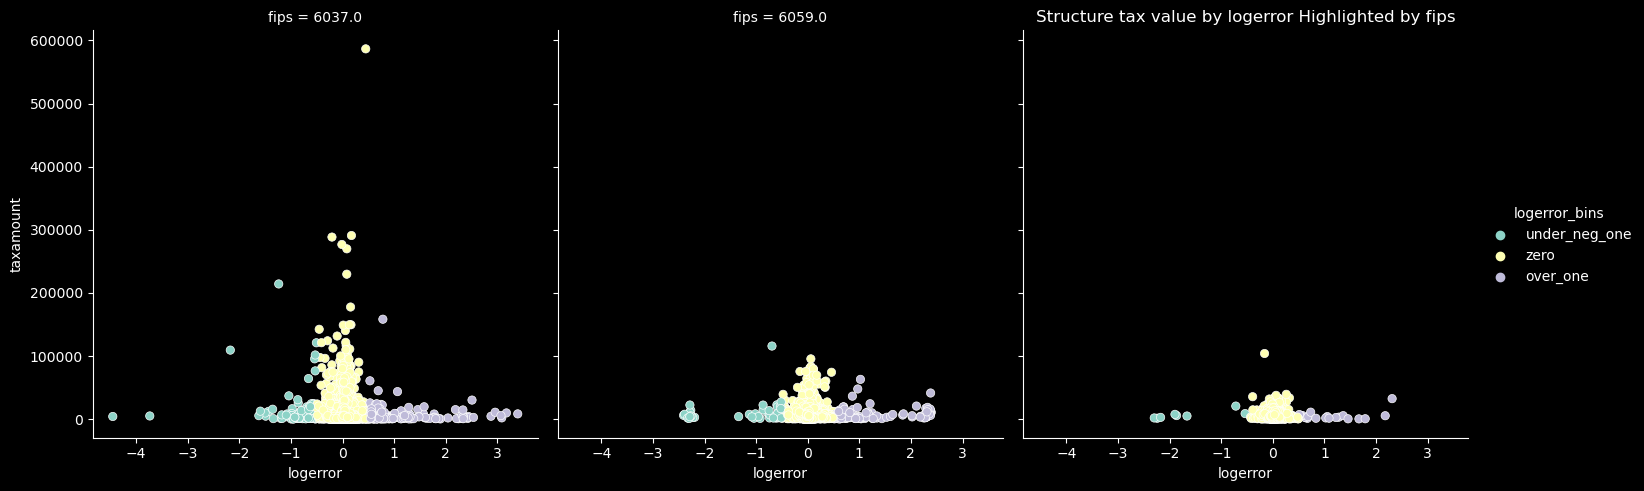

In [25]:
sns.relplot(
    data=train, 
    x='logerror', 
    y='taxamount',
    col='fips',
    hue='logerror_bins')
plt.title('Structure tax value by logerror Highlighted by fips')
plt.show()

# Q

### IS there a relationship between lotsizesquarefeet and log error? 

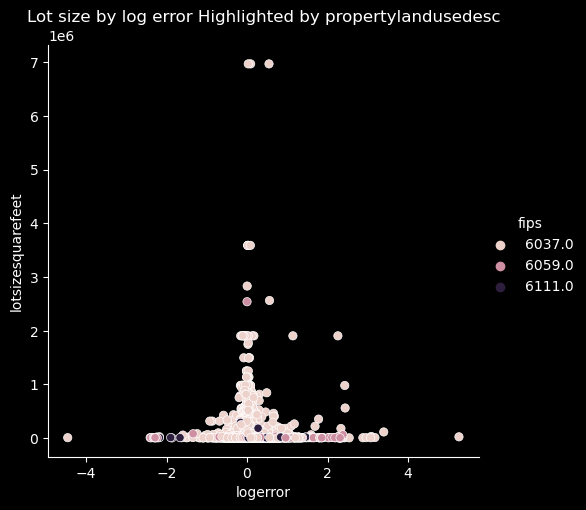

In [26]:
sns.relplot(
    data=train, 
    y='lotsizesquarefeet', 
    x='logerror', 
    hue='fips')
    
plt.title('Lot size by log error Highlighted by propertylandusedesc')
plt.show()

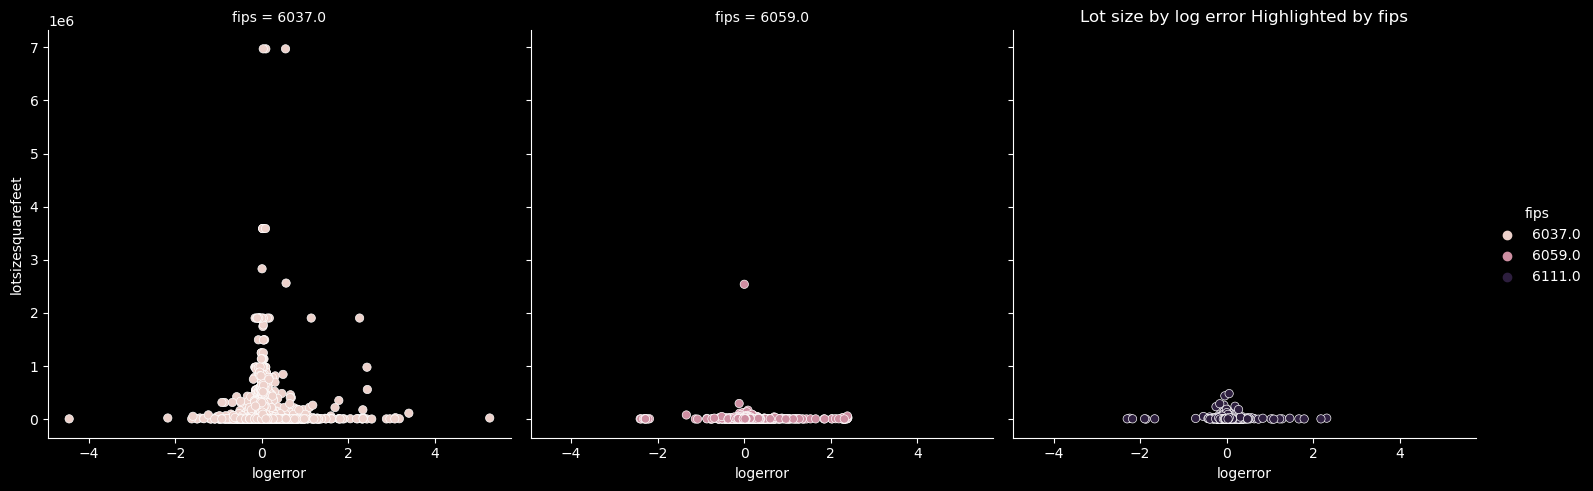

In [27]:
sns.relplot(
    data=train, 
    y='lotsizesquarefeet', 
    x='logerror', 
    hue='fips',
    col='fips')
plt.title('Lot size by log error Highlighted by fips')
plt.show()

# 6037:'LA',6059:'Orange',6111:'Ventura

### Takeaways 
- LA homes can be distinguised after a certian lotsize square feet. (weak)

# Q

### Is there a relationship between longitude/latitude and logerror? 

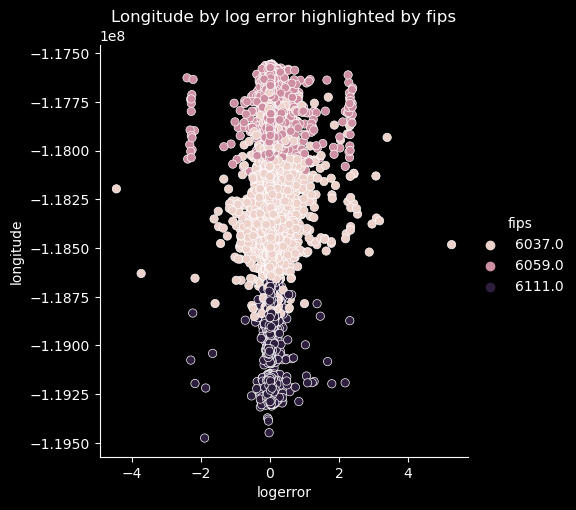

In [28]:
sns.relplot(
    data=train, 
    y='longitude', 
    x='logerror',
    hue='fips')
plt.title('Longitude by log error highlighted by fips')
plt.show()

# 6037:'LA',6059:'Orange',6111:'Ventura

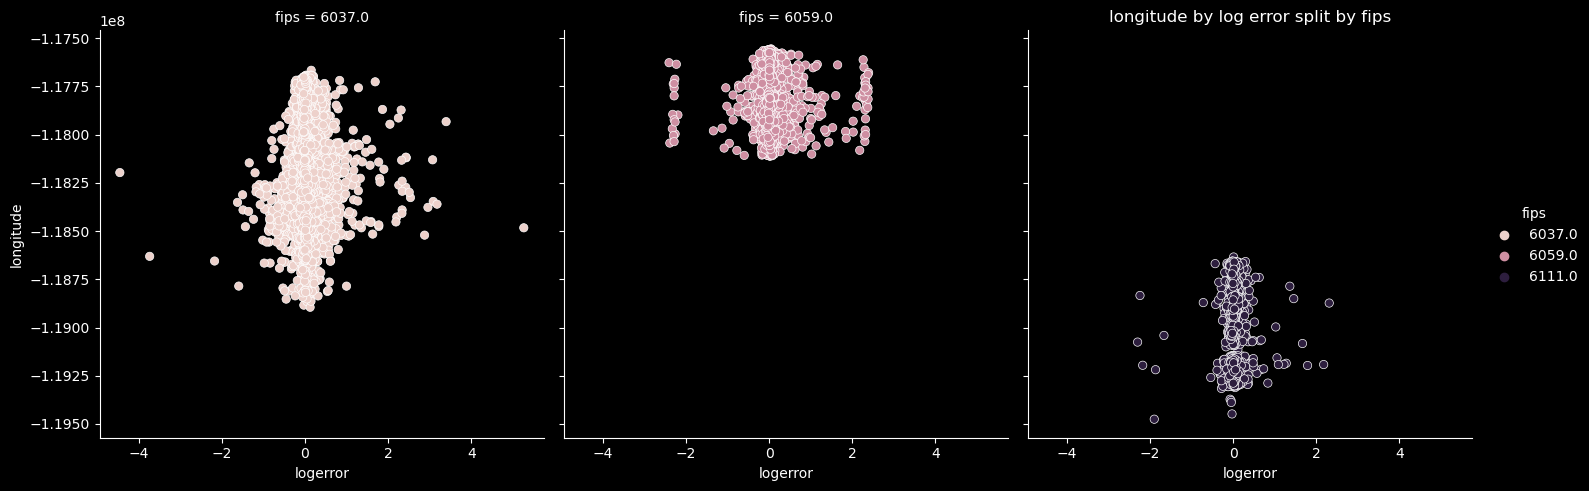

In [29]:
sns.relplot(
    data=train, 
    y='longitude', 
    x='logerror',
    hue='fips',
    col='fips')
plt.title('longitude by log error split by fips')
plt.show()

# 6037:'LA',6059:'Orange',6111:'Ventura

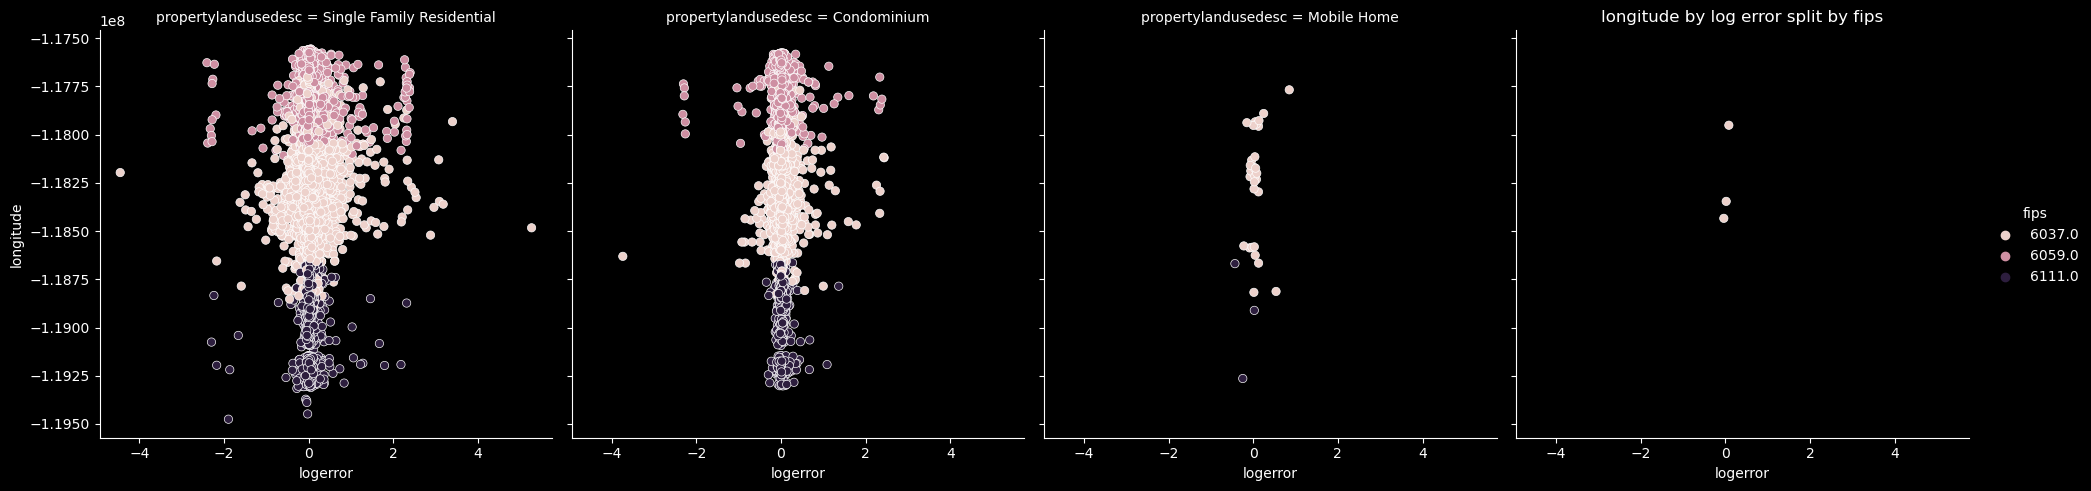

In [30]:
sns.relplot(
    data=train, 
    y='longitude', 
    x='logerror',
    hue='fips',
    col='propertylandusedesc')
plt.title('longitude by log error split by fips')
plt.show()

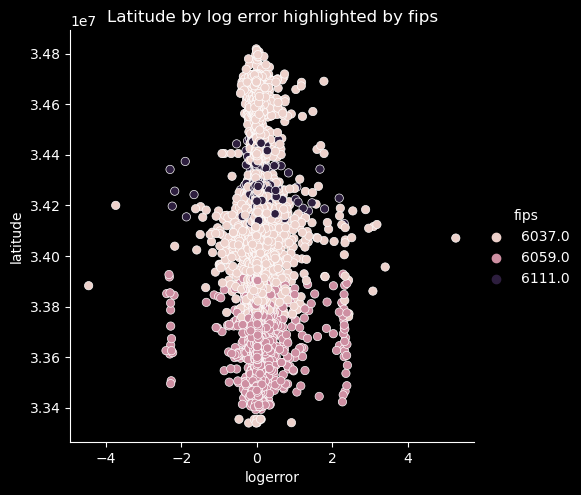

In [31]:
sns.relplot(
    data=train, 
    y='latitude', 
    x='logerror',
    hue='fips')
plt.title('Latitude by log error highlighted by fips')
plt.show()

# 6037:'LA',6059:'Orange',6111:'Ventura

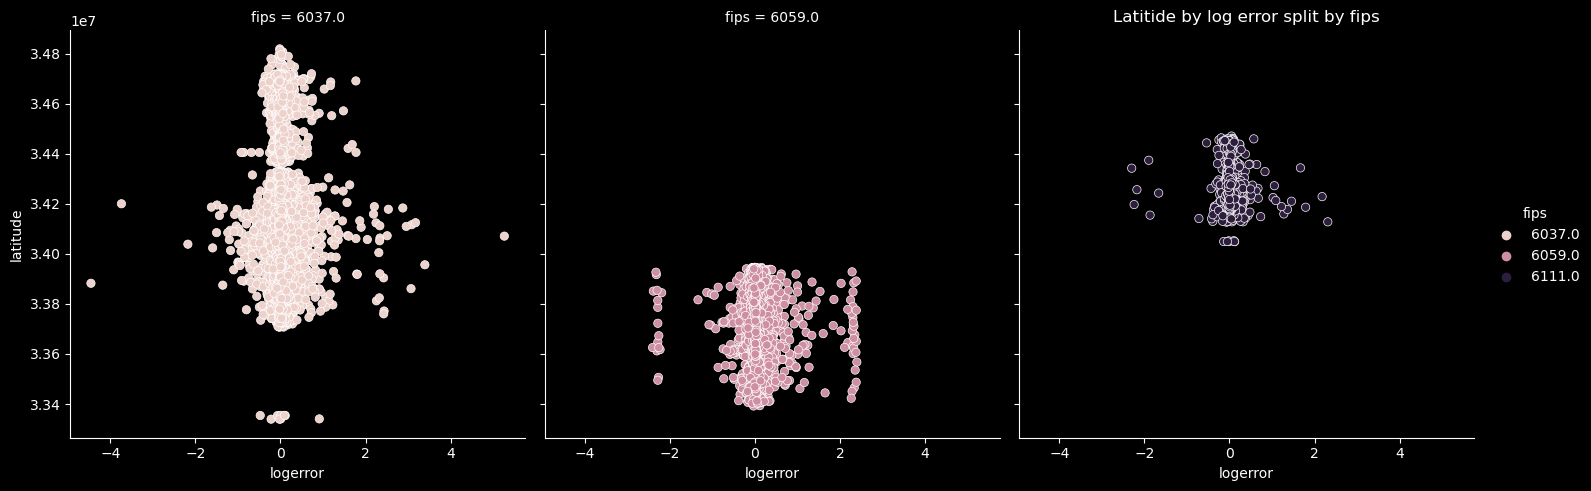

In [32]:
sns.relplot(
    data=train, 
    y='latitude', 
    x='logerror',
    hue='fips',
    col='fips')
plt.title('Latitide by log error split by fips')
plt.show()

# 6037:'LA',6059:'Orange',6111:'Ventura

### Takeaways
- there seems to be a clear split between ventura and orange county however LA overlaps both making the distinction difficult. 

### Which stats test to use?

we have continuous and continues variables
Note: when using a t-test, we have to check for equal variances

Ho: There is no linear correlation between longitude and logerror

Ha: There is a linear correlation between longitude and logerror

alpha = 0.05

In [33]:
sr,sp = stats.spearmanr(train.longitude, train.logerror)
sr,sp
eval_Sresult(sr,sp)

We fail to reject the null hypothesis that there is a linear correlation.
Spearman’s r: 0.006627
P-value: 0.1856020168194076


# Q 

### Is there a relationship between bathrooms and logerror? 

In [34]:
train.head().T

,9913,6175,53744,15678,17475
Unnamed: 0,10748,6676,58010,16963,18918
id,1269474,63912,706233,2769816,1990470
parcelid,10824297,11573966,11825751,14076872,12253638
bathroomcnt,1.0,3.0,2.0,3.5,1.0
bedroomcnt,2.0,3.0,3.0,4.0,2.0
calculatedbathnbr,1.0,3.0,2.0,3.5,1.0
calculatedfinishedsquarefeet,838.0,1520.0,967.0,2770.0,1310.0
finishedsquarefeet12,838.0,1520.0,967.0,2770.0,1310.0
fips,6037.0,6037.0,6037.0,6059.0,6037.0
fullbathcnt,1.0,3.0,2.0,3.0,1.0


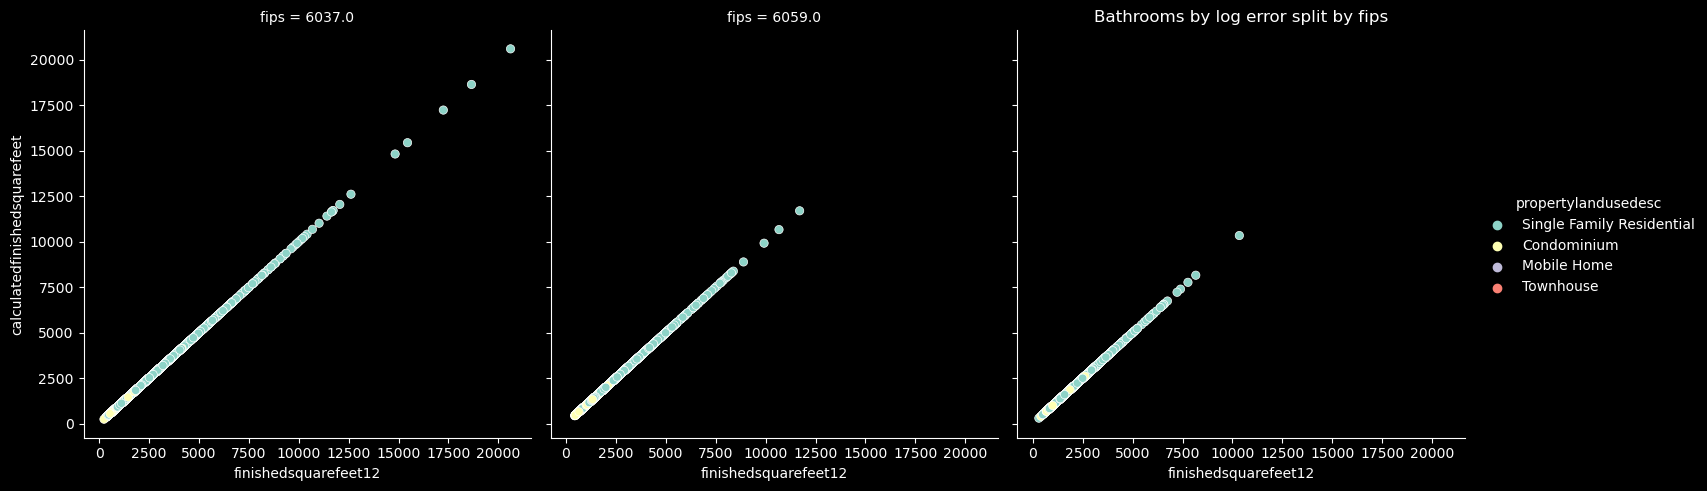

In [35]:
sns.relplot(
    data=train, 
    y='calculatedfinishedsquarefeet', 
    x='finishedsquarefeet12', 
    col='fips',
    hue='propertylandusedesc')
plt.title('Bathrooms by log error split by fips')
plt.show()

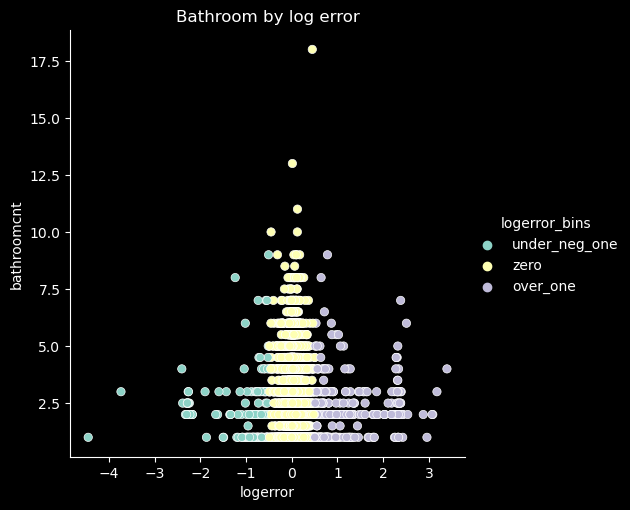

In [36]:
sns.relplot(
    data=train, 
    y='bathroomcnt', 
    x='logerror',
    hue='logerror_bins')
plt.title('Bathroom by log error')
plt.show()

### Takeaways
- The more bathrooms a single family home has the more accurate the logerror score is.  

# Q 

### Is there a relationship between fips and log error? 

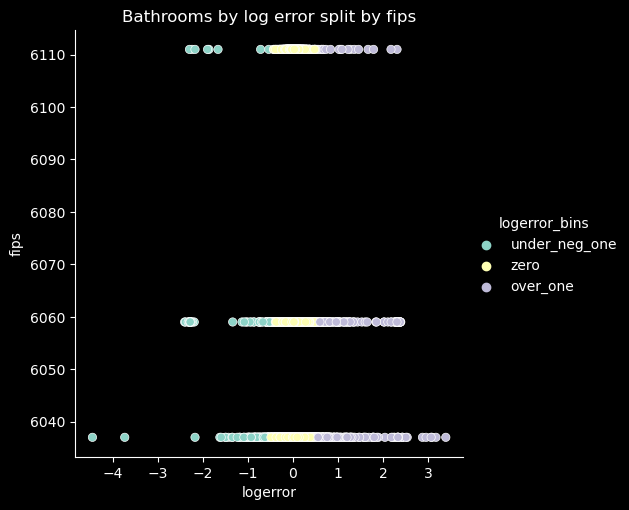

In [37]:
sns.relplot(
    data=train, 
    y='fips', 
    x='logerror', 
    hue='logerror_bins')
plt.title('Bathrooms by log error split by fips')
plt.show()